In [60]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.exposure import cumulative_distribution
import scipy as sc
from scipy.fft import fft2, ifft2, fftshift, ifftshift
import scipy.signal as sig
import math

In [2]:
a = imread('Images-lab2/city1.jpg')

In [76]:
def DFT(image):
    return np.fft.fftshift(np.fft.fft2(image))

def iDFT(image):
    return np.fft.ifft2(image)

def gaussian2DFilter(size,sigma):
    gausskernel = np.zeros((size,size),np.float32)
    for i in range (size):
        for j in range (size):
            norm = math.pow(i-1,2) + math.pow(j-1,2)
            gausskernel[i,j] = math.exp(-norm/(2*math.pow(sigma,2)))/2*math.pi*pow(sigma,2)
    sum = np.sum(gausskernel)
    kernel = gausskernel/sum
    return kernel

def myconvolve2(f, g) :                                                                                                                                                           
    # Pad g to equal size of f. This assumes f is smaller in both dimensions                                                                                                      
    # and that the difference between f and g dimensions are even                                                                                                                 
    p1, p2 = (np.r_[f.shape]-g.shape).astype(int)//2                                                                                                                              
    gpad = np.pad(g,((p1,p1),(p2,p2)),mode='edge')
    
    gpadded = np.zeros((f.shape[0], f.shape[1]))
    gpadded[int(1):int(-1 * 1), int(1):int(-1 * 1)] = g
    print(gpadded)

    # Shift g to 'center' on top left corner (the 'origin' in an fft)                                                                                                             
    gpad = np.fft.ifftshift(gpad)                                                                                                                                                  

    # Multiply spectra                                                                                                                                                            
    FG = np.fft.fft2(f) * np.conj(np.fft.fft2(gpad))                                                                                                                              
    return np.real(np.fft.ifft2(FG)), gpad 

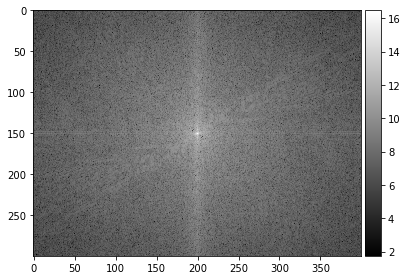

In [72]:
f = np.log(np.abs(DFT(a)))
g = np.log(np.abs(iDFT(a)))
d = f-g
imshow(f,cmap='gray')

In [61]:
k = gaussian2DFilter(5,3)

In [77]:
myconvolve2(a,k)

ValueError: could not broadcast input array from shape (5,5) into shape (298,398)

In [68]:
k.shape

(5, 5)